In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
data = datasets.load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
X = data['data']
print(X.shape)
X

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
y = data['target']
print(y.shape)
y

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

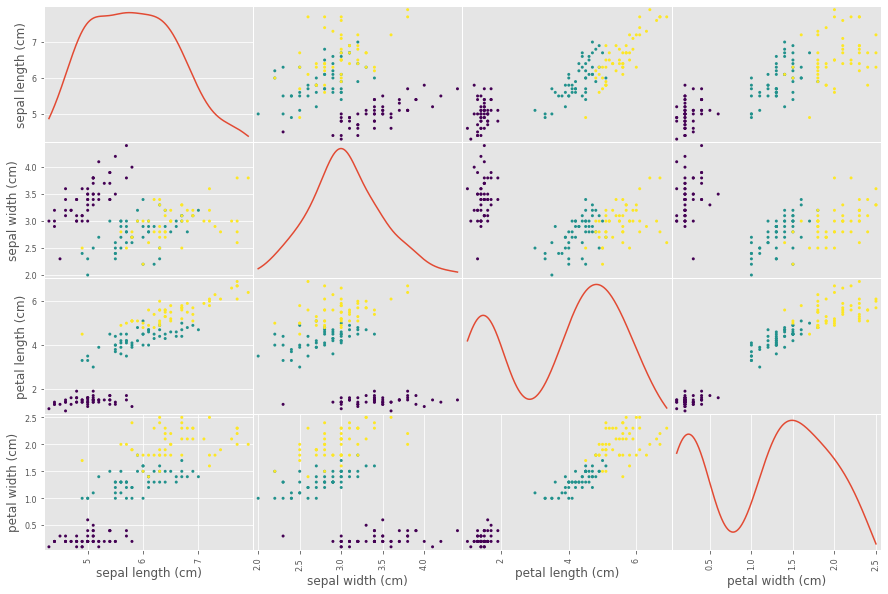

In [69]:
from pandas.plotting import scatter_matrix

df = pd.DataFrame(X, columns=data['feature_names'])

scatter_matrix(df, figsize=(15,10), c=y, grid=False, diagonal='kde', alpha=100);

Let's choose the `sepal length` X `petal length`

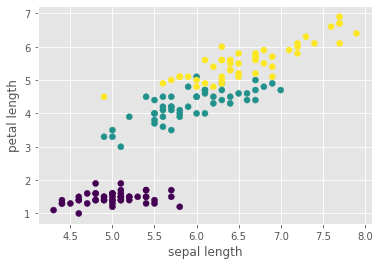

In [49]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

x1 = X[:,0]
x2 = X[:,2]

plt.scatter(x1, x2, c=y);
plt.xlabel('sepal length');
plt.ylabel('petal length');

We can see that there is nearly 3 clusters

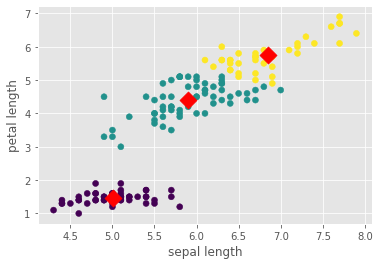

In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

labels = kmeans.predict(X)

# plotting the clusters
x1 = X[:,0]
x2 = X[:,2]

plt.scatter(x1, x2, c=labels);
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], s=150, marker='D', color='red');
plt.xlabel('sepal length');
plt.ylabel('petal length');

In [72]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [78]:
df = pd.DataFrame(np.c_[X,y,labels], columns=data['feature_names']+['species','labels'])

In [86]:
df.sample(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,labels
71,6.1,2.8,4.0,1.3,1.0,1.0
45,4.8,3.0,1.4,0.3,0.0,0.0
76,6.8,2.8,4.8,1.4,1.0,1.0
30,4.8,3.1,1.6,0.2,0.0,0.0
62,6.0,2.2,4.0,1.0,1.0,1.0
16,5.4,3.9,1.3,0.4,0.0,0.0
137,6.4,3.1,5.5,1.8,2.0,2.0
34,4.9,3.1,1.5,0.2,0.0,0.0
143,6.8,3.2,5.9,2.3,2.0,2.0
81,5.5,2.4,3.7,1.0,1.0,1.0


In [206]:
map_target_names = {k:v for k,v in enumerate(data['target_names'])}
map_target_names

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [96]:
df['species'] = df['species'].map(map_target_names)

In [97]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,labels
0,5.1,3.5,1.4,0.2,setosa,0.0
1,4.9,3.0,1.4,0.2,setosa,0.0
2,4.7,3.2,1.3,0.2,setosa,0.0
3,4.6,3.1,1.5,0.2,setosa,0.0
4,5.0,3.6,1.4,0.2,setosa,0.0


### 3 different ways of building a pivot table in Pandas

In [109]:
# first
df.groupby(['labels','species']).agg({'species':'count'}).unstack('species', fill_value=0)

species                     
species  setosa versicolor virginica
labels                              
0.0          50          0         0
1.0           0         48        14
2.0           0          2        36

In [124]:
# second
pd.pivot_table(df, index='labels', columns='species', values='sepal length (cm)', aggfunc='count', fill_value=0)

species,setosa,versicolor,virginica
labels,,,
0.0,50,0,0
1.0,0,48,14
2.0,0,2,36


In [122]:
# third
pd.crosstab(df['labels'], df['species'])

species,setosa,versicolor,virginica
labels,,,
0.0,50,0,0
1.0,0,48,14
2.0,0,2,36


labels = 0 corresponds to setosa

labels = 1 corresponds to versicolor

labels = 2 corresponds to virginica

### Elbow Method

In [139]:
ks = np.arange(1,11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=28)
    model.fit(X)
    inertias.append(model.inertia_)

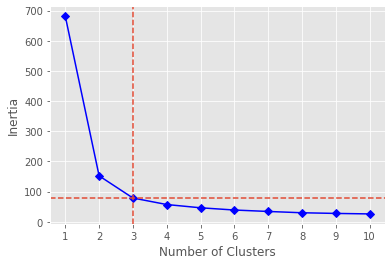

In [182]:
plt.plot(ks, inertias, marker='D', color='blue');
plt.xticks(range(1,11));
plt.xlabel('Number of Clusters');
plt.ylabel('Inertia');
plt.axhline(inertias[2], linestyle='--');
plt.axvline(ks[2], linestyle='--');

k = 3 is the best number of cluster.

In [181]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.920000
std,0.828066,0.435866,1.765298,0.762238,0.764304
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,1.750000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Normalizing the features

In [183]:
from sklearn.preprocessing import StandardScaler

In [184]:
scaler = StandardScaler()

In [209]:
X_scaled = scaler.fit_transform(X)

In [210]:
df_scaled = pd.DataFrame(np.c_[X_scaled,y], columns=data['feature_names']+['species'])

In [211]:
df_scaled['species'] = df_scaled['species'].map(map_target_names)

In [212]:
df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


Now the features have a mean = 0 and a std = 1.

In [213]:
model = KMeans(n_clusters=3)
df_scaled['labels'] = model.fit_predict(X_scaled)

In [214]:
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,labels
0,-0.900681,1.019004,-1.340227,-1.315444,setosa,1
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa,1
2,-1.385353,0.328414,-1.397064,-1.315444,setosa,1
3,-1.506521,0.098217,-1.283389,-1.315444,setosa,1
4,-1.021849,1.249201,-1.340227,-1.315444,setosa,1


In [215]:
pd.crosstab(df_scaled['labels'], df_scaled['species'])

species,setosa,versicolor,virginica
labels,,,
0,0,39,14
1,50,0,0
2,0,11,36


This crosstab is very similar to the previous one above. This mean that scaling the features didn't help.

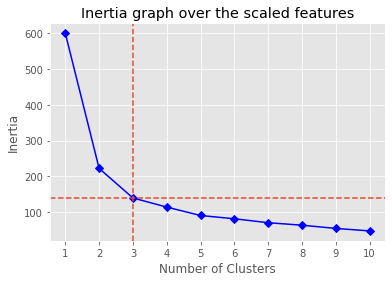

In [218]:
ks = np.arange(1,11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=28)
    model.fit(X_scaled)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, marker='D', color='blue');
plt.xticks(range(1,11));
plt.xlabel('Number of Clusters');
plt.ylabel('Inertia');
plt.axhline(inertias[2], linestyle='--');
plt.axvline(ks[2], linestyle='--');
plt.title('Inertia graph over the scaled features');

## Visualizing with PCA

In [249]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

labels = kmeans.predict(X)

In [266]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_reduced = pca.fit_transform(X)

np.var(X_reduced, axis=0)

array([4.20005343, 0.24105294])

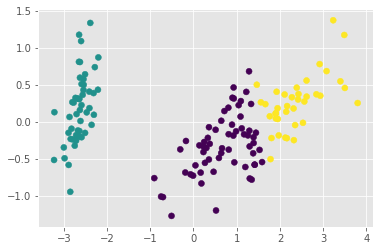

In [252]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels);

In [262]:
#incluindo os clusters na figura
cluster_centers_reduced = pca.transform(kmeans.cluster_centers_)
cluster_centers_reduced

array([[ 0.67566229, -0.31520477],
       [-2.64241546,  0.19088505],
       [ 2.37446608,  0.26311694]])

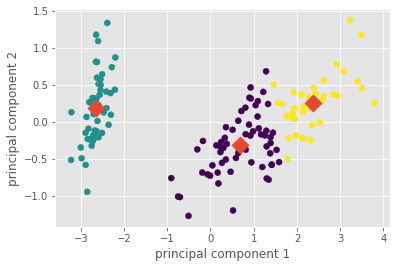

In [265]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels);
plt.scatter(cluster_centers_reduced[:,0], cluster_centers_reduced[:,1], marker='D', s=150);
plt.xlabel('principal component 1');
plt.ylabel('principal component 2');